In [1]:
import numpy as np

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import seml.database as db_utils
import jkutils.mpl_latex_template as mplt
from pathlib import Path

import torch

from itertools import product

from statsmodels.stats.proportion import proportion_confint

import pandas as pd

import os

import sys
sys.path.append('..')
from utils import load_results, plot_results_dict

#%matplotlib inline

In [2]:
collection = 'equivariance_modelnet40_cert'


jk_config = {
    'username': 'your-username',
    'password': 'your-password',
    'host': 'your-host-address',
    'port': 27017,
    'db_name': 'your-dbname'
}

col = db_utils.get_collection(collection, mongodb_config=jk_config)

In [3]:
def get_experiments(col, restrictions={}):
    
    restrictions['status'] = 'COMPLETED'

    if col.count_documents(restrictions) == 0:
        raise ValueError('No matches!')

    exps = col.find(restrictions, {'config':1, 'result': 1})
    
    return exps

In [4]:
def get_certificates(raw_results_file):
    raw_results = torch.load(raw_results_file)

    budgets = list(raw_results.keys())

    correct = np.zeros(len(budgets))
    certified = np.zeros(len(budgets))
    certified_correct = np.zeros(len(budgets))

    for i, budget in enumerate(budgets):
        cloud_ids = raw_results[budget].keys()
        certified_at_budget = 0
        certified_correct_at_budget = 0
        correct_at_budget = 0

        for j, cloud_id in enumerate(raw_results[budget].keys()):
            cloud_results = raw_results[budget][cloud_id]

            if cloud_results['correct']:
                correct_at_budget += 1
            if cloud_results['p_certs_baseline'][0] > 0.5:
                certified_at_budget += 1
            if cloud_results['correct'] and (cloud_results['p_certs_baseline'][0] > 0.5):
                certified_correct_at_budget+=1
            
        certified_at_budget /= len(raw_results[budget].keys())
        certified_correct_at_budget /= len(raw_results[budget].keys())
        correct_at_budget /= len(raw_results[budget].keys())

        correct[i] = correct_at_budget
        certified[i] = certified_at_budget
        certified_correct[i] = certified_correct_at_budget

    cert_dict = {
        'budgets': budgets,
        'correct': correct,
        'certified': certified,
        'certified_correct': certified_correct,
    }

    return cert_dict

In [5]:
def generate_exp_result_dict(exp):

    result_dict = {}

    result_dict['seed'] = exp['config']['seed']

    result_dict['dataset'] = exp['config']['dataset']['name']
    result_dict['model'] = exp['config']['pred_sample_loading']['restrictions']['train_loading']['restrictions']['model']['model_type']
    
    result_dict['std'] = exp['config']['std']
    
    result_dict['raw_results_file'] = exp['result']['save_file']

    cert_dict = get_certificates(result_dict['raw_results_file'])

    result_dict.update(cert_dict)

    return result_dict

In [6]:
# Use commented out code if you want to use your own data
#experiments = get_experiments(col)
#results = load_results(
#            generate_exp_result_dict,
#            experiments,
#            results_file='./raw_data',
#            overwrite=True
#            )


results = load_results(
            generate_exp_result_dict,
            None,
            results_file='./raw_data',
            overwrite=False
            )


In [7]:
results

,seed,dataset,model,std,raw_results_file,budgets,correct,certified,certified_correct
0,0,modelnet40,pointnet,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8861426256077796, 0.8861426256077796, 0.886...","[0.9829821717990276, 0.9651539708265803, 0.945...","[0.8804700162074555, 0.8731766612641815, 0.864..."
1,0,modelnet40,pointnet,0.10,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8747974068071313, 0.8747974068071313, 0.874...","[0.9696110210696921, 0.9586709886547812, 0.945...","[0.8650729335494327, 0.859805510534846, 0.8549..."
2,0,modelnet40,pointnet,0.15,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8646677471636953, 0.8646677471636953, 0.864...","[0.9448946515397083, 0.9323338735818476, 0.915...","[0.8460291734197731, 0.8391410048622366, 0.831..."
3,0,modelnet40,pointnet,0.20,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8476499189627229, 0.8476499189627229, 0.847...","[0.9181523500810372, 0.9051863857374393, 0.892...","[0.8140194489465153, 0.8079416531604539, 0.800..."
4,0,modelnet40,pointnet,0.25,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.809967585089141, 0.809967585089141, 0.80996...","[0.8804700162074555, 0.8675040518638574, 0.857...","[0.7645867098865479, 0.7568881685575365, 0.752..."
5,0,modelnet40,dgcnn,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.9112641815235009, 0.9112641815235009, 0.911...","[0.9821717990275527, 0.9578606158833063, 0.943...","[0.9055915721231766, 0.8934359805510534, 0.885..."
6,0,modelnet40,dgcnn,0.10,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8978930307941653, 0.8978930307941653, 0.897...","[0.9712317666126418, 0.9574554294975689, 0.946...","[0.8869529983792545, 0.880064829821718, 0.8743..."
7,0,modelnet40,dgcnn,0.15,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8804700162074555, 0.8804700162074555, 0.880...","[0.9663695299837926, 0.9550243111831442, 0.939...","[0.8642625607779578, 0.8577795786061588, 0.848..."
8,0,modelnet40,dgcnn,0.20,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.853322528363047, 0.853322528363047, 0.85332...","[0.9347649918962723, 0.9278768233387358, 0.918...","[0.8282009724473258, 0.8237439222042139, 0.820..."
9,0,modelnet40,dgcnn,0.25,/nfs/staff-hdd/schuchaj/equivariance_certifica...,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.8257698541329012, 0.8257698541329012, 0.825...","[0.9254457050243112, 0.9116693679092382, 0.903...","[0.7990275526742301, 0.7925445705024311, 0.788..."


In [8]:
def prepare_plot_dict(res):
    plot_dict = {}


    print(f'Preparing {len(res)} results.')

    for i in range(len(res)):
        row = res.iloc[i]

        model = row['model']
        model = {
            'pointnet': 'PointNet',
            'dgcnn': 'DGCNN'
        }[model]

        if model not in plot_dict:
            plot_dict[model] = {
                'budgets': np.array(row['budgets']),
                'cert_metrics': [row['certified_correct']]
            }
        
        else:
            plot_dict[model]['cert_metrics'].append(row['certified_correct'])

    for model in plot_dict:
        num_seeds = len(plot_dict[model]['cert_metrics'])
        padded_metrics = np.zeros((num_seeds, len(plot_dict[model]['budgets'])))

        for i, m in enumerate(plot_dict[model]['cert_metrics']):
            padded_metrics[i, :len(m)] = m

        plot_dict[model]['cert_metrics'] = padded_metrics.mean(axis=0)
        plot_dict[model]['errors'] = padded_metrics.std(axis=0) * 1

    return plot_dict

Preparing 10 results.
Max error for PointNet is 0.006540466377303424
Max error for DGCNN is 0.006902930126109191


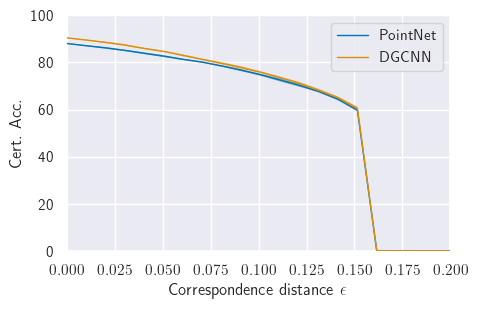

In [9]:
#format = 'pdf'
format = 'pgf'

std = 0.05
res = results.loc[(results['std'] == std)]


plt_dict_005 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plt_dict_005, 'Correspondence distance $\epsilon$', 'Cert. Acc.', clip_on=True, zorder=3, ylim=1, xlim=0.2,
                  yticks_params={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1.0], 'labels': ['0%', '20%', '40%', '60%', '80%', '100%']})


Preparing 10 results.
Max error for PointNet is 0.016610862852925727
Max error for DGCNN is 0.008975038504998954


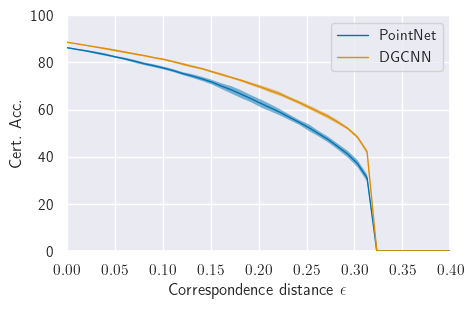

In [10]:
#format = 'pdf'
format = 'pgf'

std = 0.1
res = results.loc[(results['std'] == std)]


plt_dict_01 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plt_dict_01, 'Correspondence distance $\epsilon$', 'Cert. Acc.', clip_on=True, zorder=3, ylim=1, xlim=0.4,
                  yticks_params={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1.0], 'labels': ['0%', '20%', '40%', '60%', '80%', '100%']})


Preparing 10 results.
Max error for PointNet is 0.014205813881443837
Max error for DGCNN is 0.006744132340863266


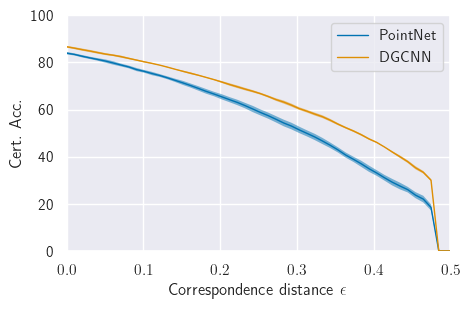

In [11]:
std = 0.15
res = results.loc[(results['std'] == std)]


plt_dict_015 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plt_dict_015, 'Correspondence distance $\epsilon$', 'Cert. Acc.', clip_on=True, zorder=3, ylim=1, xlim=0.5,
                yticks_params={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1.0], 'labels': ['0%', '20%', '40%', '60%', '80%', '100%']})


Preparing 10 results.
Max error for PointNet is 0.01895059801592191
Max error for DGCNN is 0.02005144569752015


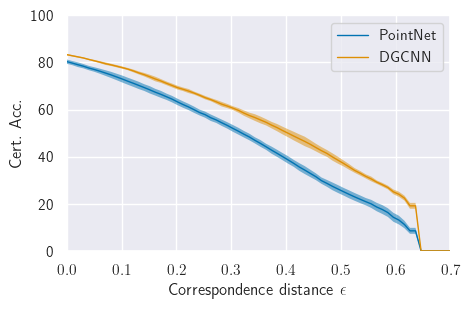

In [12]:
std = 0.2
res = results.loc[(results['std'] == std)]


plt_dict_02 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plt_dict_02, 'Correspondence distance $\epsilon$', 'Cert. Acc.', clip_on=True, zorder=3, ylim=1, xlim=0.7,
                yticks_params={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1.0], 'labels': ['0%', '20%', '40%', '60%', '80%', '100%']})

Preparing 10 results.
Max error for PointNet is 0.01919848179349171
Max error for DGCNN is 0.012641815235008097


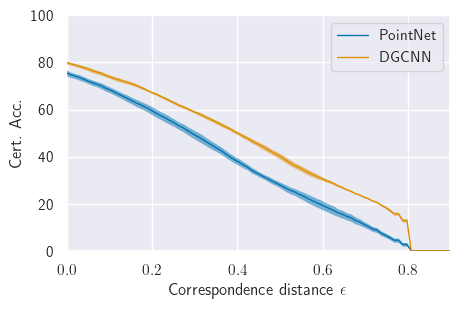

In [13]:
std = 0.25
res = results.loc[(results['std'] == std)]


plt_dict_025 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plt_dict_025, 'Correspondence distance $\epsilon$', 'Cert. Acc.', clip_on=True, zorder=3, ylim=1, xlim=0.9,
                yticks_params={'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1.0], 'labels': ['0%', '20%', '40%', '60%', '80%', '100%']})


In [14]:
print(plt_dict_005['PointNet']['cert_metrics'][0])
print(plt_dict_005['DGCNN']['cert_metrics'][0])

0.8803079416531604
0.9042949756888168


In [15]:
print(plt_dict_025['PointNet']['cert_metrics'][0])
print(plt_dict_025['DGCNN']['cert_metrics'][0])

0.7545380875202593
0.7987844408427877


In [16]:
(90.4 - 88) - (79.9 - 75.5)

-2.0

In [17]:
print((plt_dict_025['PointNet']['cert_metrics'] - plt_dict_005['DGCNN']['cert_metrics']).max())

0.6290923824959481
